In [58]:
library(tidyverse)
library(repr)
library(GGally)

players_url <- "https://raw.githubusercontent.com/aketineni/DSCI100_final_planning/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/aketineni/DSCI100_final_planning/refs/heads/main/sessions.csv"

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# DSCI 100 Final Project Planning Proposal - Arnav Ketineni #

(1) Data Description:
Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

## Data Description ##

The `players.csv` dataset contains information about 196 players and 7 variables about each player. These variables are:
1. `experience (chr)`: Describes the player's experience level as pro, veteran, regular, amateur, or beginner.
    1. There are 14 pros, 48 veterans, 36 regulars, 63 amateurs, and 35 beginners
3. `subscribe (lgl)`: Indicates if the player is subscribed or not
    1. 144 of the players were subscribed and 52 were not
5. `hashedEmail (chr)`: Contains the player's email
6. `played_hours (dbl)`: Contains how many total hours the player has played on the server
    1. The average playtime was 5.85 hrs, ranging from 0 hrs - 223.1hrs, with a median of 0.10hrs
8. `name (chr)`: Contains the player's name
9. `age (dbl)`: Contain the player's age
    1. The average age of the players was 21.14 years old, ranging from 9-58 years old, with a median of 19 years old.
11. `gender (chr)`: Contains the players gender out of the choices male, female, non-binary, agender, two-spirited, other, and prefer not to say
    1. There were 124 male, 37 female, 15 non-binary, 2 agender, and 6 two-spirited players. 11 players chose to not indicate a gender and 1 player chose other.

One issue present in the data is the presence of NAs for two observations in the `age` column. This means that these observations will either need to have the age imputed to be used in models with age as a predictor or removed. Similarly, the `gender` column has options including "Prefer not to say" and "Other". These columns will cause issues for predictive questions involving the gender of players, since these observations do not have a specific category they can be classified into, and cannot necessarily be imputed. 

Regarding the `played_hours` variable, this number partially depends on how the player uses PLAICraft. Each player starts with 30 minutes of playtime available for them to use, and recieve more playtime for doing actions such as talking to people in-game and inviting friends to join the server, and passively for the time they aren't on the server (PLAICraft). This means that `played_hours` is likely influenced by other factors beyond the data give in the dataset, such as whether or not the player is comfortable talking to strangers or how many people they may want to invite to play PLAICraft.

The `sessions.csv` dataset contains information about 1535 play sessions and 5 variables about each. These variables are:
1. `hashedEmail (chr)`: Contains the player's email
2. `start_time (chr)`/`end_time (chr)`: Contains the date and time that the player started/ended the session
4. `original_start_time (dbl)`/ `original_end_time (dbl)`: Contains the start/end time in UNIX time (ms)

An issue with this dataset is there are two observations with NAs in the `end_time` and `original_end_time` columns, which means that there are two sessions that have a start time, but their end time isn't known. Similar to the `gender` column in the `players.csv` database, this value will cause issues for prediction models that use these columns, since the values for these columns can't be easily imputed.

In [20]:
players <- read_csv(players_url) |>
    mutate(experience = as_factor(experience),
          gender = as_factor(gender))

head(players)
summary(players, digits = 4)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


    experience subscribe       hashedEmail         played_hours    
 Pro     :14   Mode :logical   Length:196         Min.   :  0.000  
 Veteran :48   FALSE:52        Class :character   1st Qu.:  0.000  
 Amateur :63   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Beginner:35                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age       
 Length:196         Male             :124   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Non-binary       : 15   Median :19.00  
                    Prefer not to say: 11   Mean   :21.14  
                    Agender          :  2   3rd Qu.:22.75  
                    Two-Spirited     :  6   Max.   :58.00  
                    Other           

In [80]:
sessions <- read_csv(sessions_url) |>
    mutate(start_time = dmy_hm(start_time),
          end_time = dmy_hm(end_time))

head(sessions)
summary(sessions, digits = 4)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12


 hashedEmail          start_time                    
 Length:1535        Min.   :2024-04-06 09:27:00.00  
 Class :character   1st Qu.:2024-05-20 20:28:00.00  
 Mode  :character   Median :2024-06-24 02:51:00.00  
                    Mean   :2024-06-24 03:54:03.51  
                    3rd Qu.:2024-07-25 06:56:00.00  
                    Max.   :2024-09-26 06:09:00.00  
                                                    
    end_time                      original_start_time original_end_time  
 Min.   :2024-04-06 09:31:00.00   Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:2024-05-20 21:37:00.00   1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :2024-06-23 22:04:00.00   Median :1.719e+12   Median :1.719e+12  
 Mean   :2024-06-24 02:26:18.03   Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:2024-07-25 07:00:00.00   3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :2024-09-26 07:39:00.00   Max.   :1.727e+12   Max.   :1.727e+12  
 NA's   :2                                            NA's

## Question ##

Can **session start time** and **session length** predict **experience** using the players and sessions dataset?

To answer this question, a regression model using the columns from `start_time`, `original_start_time`, `original_end_time` as predictor variables and `experience` as the response variable. The data will need to be modified to be able to apply either regression approach. First, each of the observations in `sessions.csv` will need to be assigned an experience by matching the value for `hashedEmail` for that session to an email in `players.csv`. Session length will need to be calculated using the difference between `original_start_time` and `original_end_time`. Finally, the exact hour and minute that the session started will need to be separated from the `start_time` column. Once these are done, a KNN regression model can be fitted onto the data.

## Exploratory Data Analysis and Visuzalization ##

In [78]:
players_avgs <- players |>
    summarize(avg_played_hours = mean(played_hours), avg_age = mean(Age, na.rm = TRUE))
players_avgs

avg_played_hours,avg_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


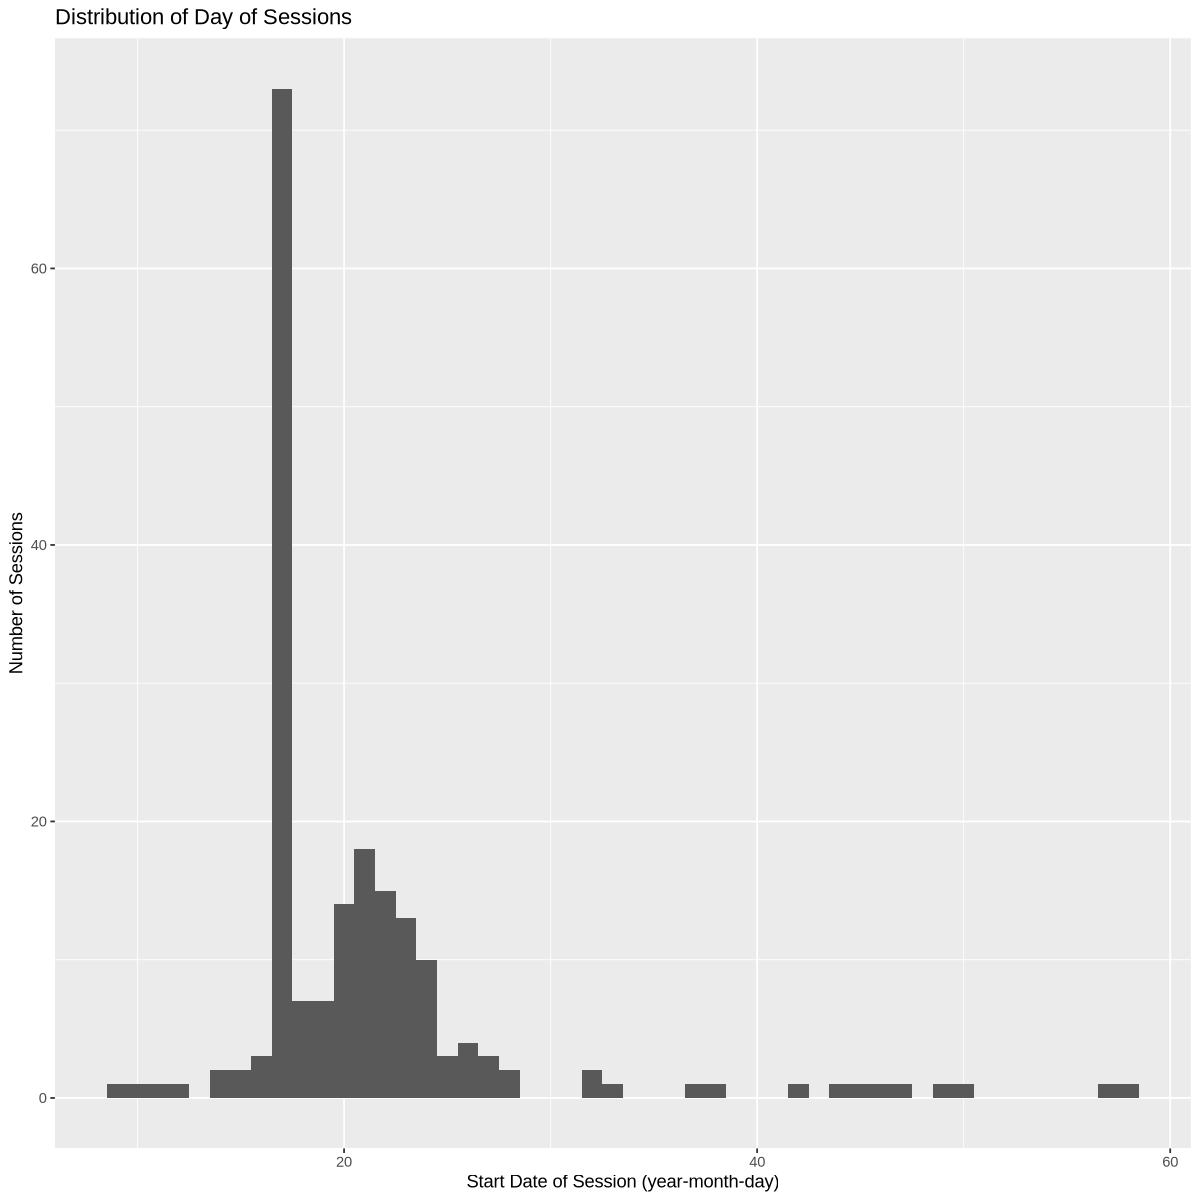

In [86]:
start_date_histo <- ggplot(players, aes(x = Age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Start Date of Session (year-month-day)", y = "Number of Sessions", title = "Distribution of Day of Sessions")

start_date_histo

This histogram shows the distribution of ages among the players. It shows that almost all of the players were between 16 and 28 years old. The study is dominated by 17 year olds, with there being 3x as many 17 year olds as the next most common age. The ages range from 9 to 57 years old.

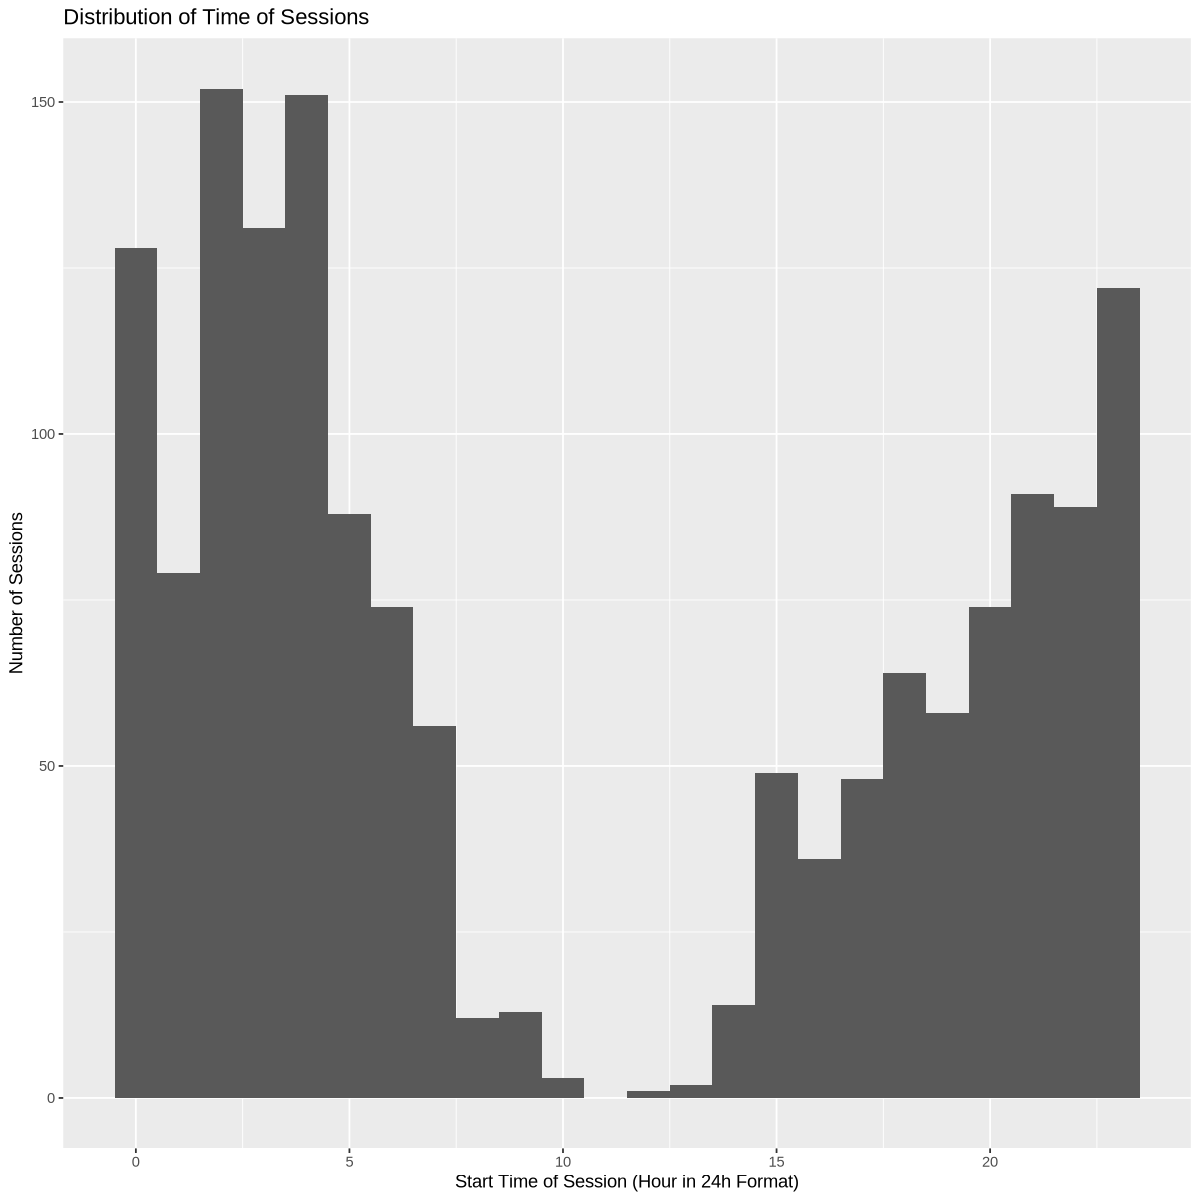

In [82]:
start_time_histo <- ggplot(sessions, aes(x = hour(start_time))) +
    geom_histogram(bins = 24) +
    labs(x = "Start Time of Session (Hour in 24h Format)", y = "Number of Sessions", title = "Distribution of Time of Sessions")

start_time_histo

This histogram shows the distribution of what time in the day people started their sessions. It shows that most people started their sessions between 16:00 and 6:00, with a gradual rise starting from 14:00, peaks from 24:00 - 4:00, and a descent starting at 5:00. Almost no one started their sessions between 8:00 and 14:00.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


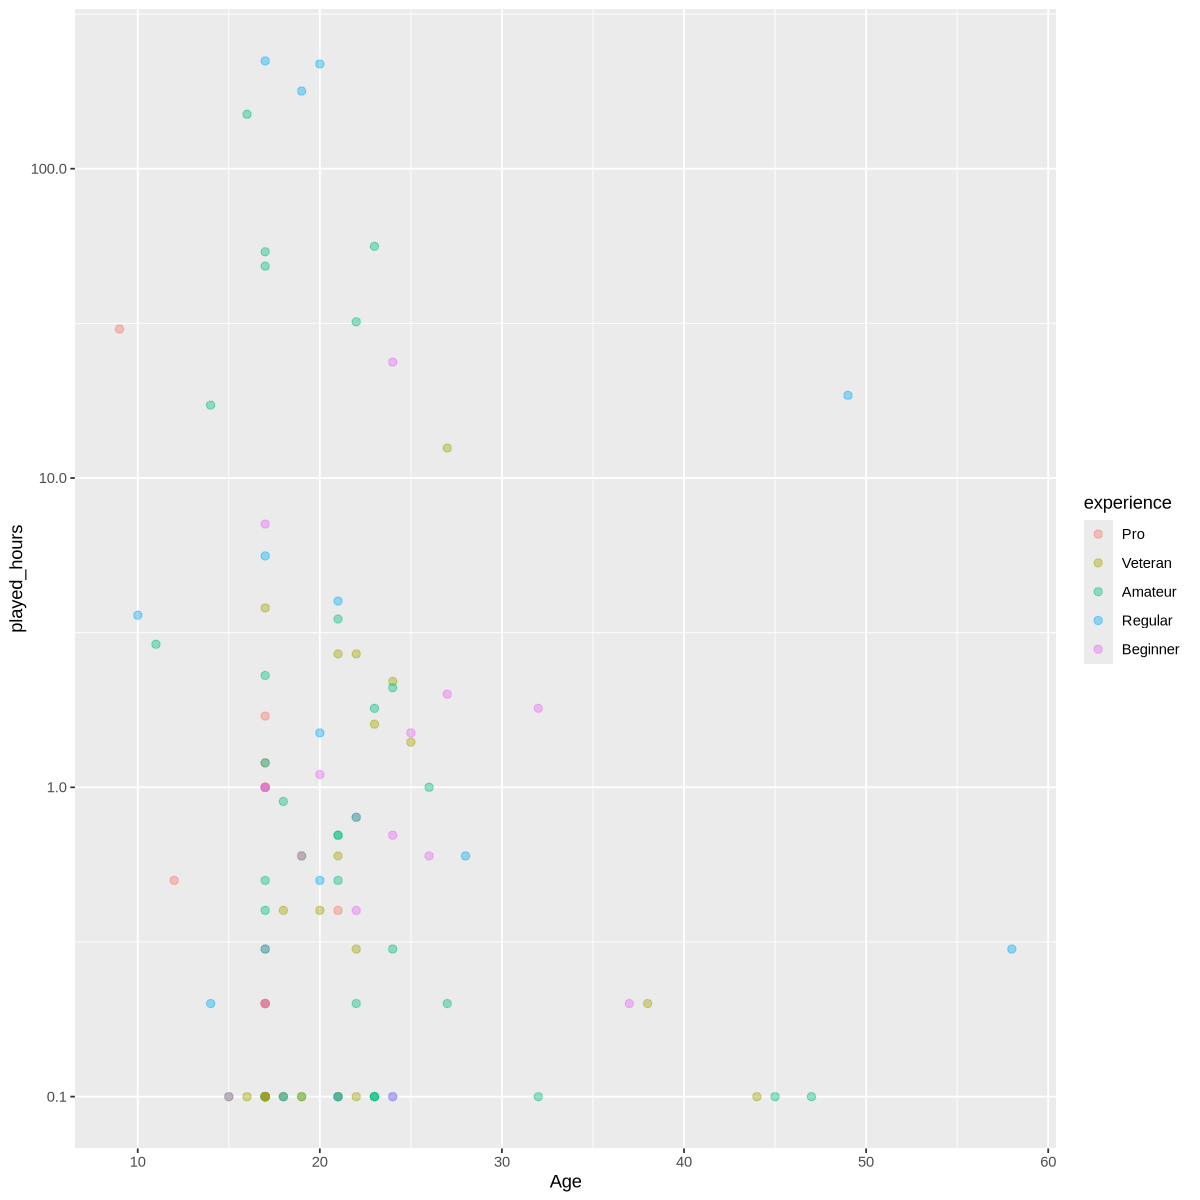

In [75]:
options(repr.plot.width = 10, repr.plot.height = 10)
hours_vs_age <- players |>
    filter(played_hours > 0) |>
    ggplot(aes(x = Age, y = played_hours, colour = experience)) +
        geom_point(alpha = 0.4, size = 2) +
        scale_y_log10()
hours_vs_age

This scatter plot shows the relationship between age and how many hours the person has played. It also separates the players based on their experience level. According to the plot, there is no obvious relationship between the two, and experience doesn't seem to impact how long people play or how old their are.

## Methods and Plan ##
(4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

## Github Repository ##
https://github.com/aketineni/DSCI100_final_planning